<h1><center> Livrable final projet </center></h1>
$\underline{Groupe :}$<br>
    - Pierre Anorga<br>
    - Thierry Huguet<br>
    - Luken Irazoqui<br>
    - Antoine Payet<br>
    - Leo Trivino<br>
    

## INTRODUCTION

Notre projet consiste à réaliser une optimisation des distances de parcours des camions en utilisant une approche de programmation des véhicules routiers (VRP). En réponse à l'appel lancé par l'Agence de l'Environnement et de la Maîtrise de l'Énergie (ADEME) visant à promouvoir de nouvelles solutions de mobilité adaptées aux différents territoires, notre structure, CesiCDP, s'est engagée à développer des démonstrateurs et des expérimentations dans le domaine de la Mobilité Multimodale Intelligente.

Dans ce contexte, nous nous concentrons sur la gestion des tournées de livraison, un problème crucial pour optimiser la logistique du transport et réduire l'impact environnemental. Le défi consiste à optimiser la distance parcourue par chaque camion de sorte à ce que les distances parcourues par camion soient le plus homogène possible.

Quelle approche de Recherche Opérationnelle peut être employée pour résoudre efficacement le problème de gestion des tournées de livraison, en tenant compte des contraintes telles que le nombre de camions disponibles, de sorte à ce que les distances parcourues par camion soient le plus homogène possible ?

Notre étude se compose de trois grandes parties : la modélisation du problème de gestion des tournées de livraison, son implémentation pratique, et enfin l'annonce du plan d'expérience ainsi que l'analyse des résultats. 

Dans la première partie, nous nous penchons sur la modélisation du problème en utilisant le Vehicle Routing Problem (VRP). <br>
Dans la deuxième partie, nous passons à l'implémentation pratique de notre approche. Nous décrivons en détail l'implémentation de l'algorithme génétique pour résoudre le VRP, en expliquant les choix spécifiques que nous avons faits. <br>
Nous présentons ensuite les résultats obtenus en appliquant notre implémentation sur différents cas de test représentatifs. De plus, nous élargissons notre approche pour résoudre le Multi-Vehicle Routing Problem (mTSP). <br>
Enfin, nous réalisons une étude expérimentale pour évaluer les performances de nos méthodes de résolution et leur efficacité dans la gestion des tournées de livraison. Nous détaillons notre plan d'expérience et effectuons une analyse statistique des résultats obtenus.


## PARTIE 1 : MODELISATION

### 1. Preuve que le problème du VRP est au moins NP-Complet

Si nous arrivons à prouver que le problème du TSP est NP-Complet, nous pourrons en déduire que le problème du VRP est lui aussi, **au moins** NP-Complet.


    - Étape 1: Montrer que TSP appartient à la classe NP
Pour prouver que TSP appartient à la classe NP, nous devons montrer qu'une solution proposée peut être vérifiée en temps polynomial.

Supposons que nous ayons une solution proposée pour TSP, qui est un chemin qui passe par tous les sommets d'un graphe et a une longueur inférieure ou égale à une valeur donnée k. Nous pouvons vérifier cette solution en calculant la longueur du chemin et en vérifiant si elle est inférieure ou égale à k. Ce processus de vérification peut être effectué en temps polynomial, ce qui démontre que TSP appartient à la classe NP.

    - Étape 2: Réduire un problème NP-complet connu à TSP
Pour prouver que TSP est NP-complet, nous devons réduire un problème NP-complet connu à TSP. Un problème bien connu qui est NP-complet est le problème du cycle hamiltonien (HC - Hamiltonian Circuit).

La réduction consiste à prendre une instance du problème HC et la transformer en une instance du problème TSP de telle sorte que la réponse à la nouvelle instance de TSP est identique à la réponse au problème HC d'origine.

Au départ, on dispose d'un graphe hamiltonien de base qui ne comporte pas de poids sur ses arêtes. Maintenant, l'objectif est d'effectuer une réduction polynomiale, ce qui implique de transformer ce graphe hamiltonien en un graphe complet où chaque arête aura un poids associé. Pour réaliser cette transformation, on construit un graphe complet à partir du graphe hamiltonien de base. Dans ce nouveau graphe complet, toutes les paires de sommets sont reliées par une arête. Cependant, contrairement au graphe hamiltonien initial, chaque arête du graphe complet sera maintenant associée à un poids spécifique.

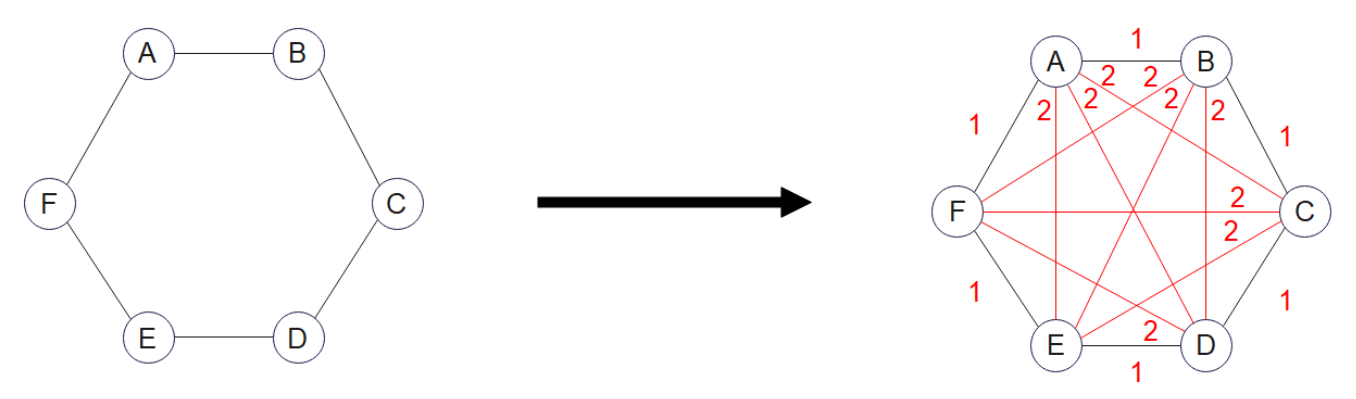

Maintenant, si nous trouvons une solution pour TSP avec une longueur inférieure ou égale à k, cela signifie que nous avons également trouvé un circuit hamiltonien dans le graphe d'origine. De même, si nous ne trouvons pas de solution pour TSP avec une longueur inférieure ou égale à k, cela signifie qu'il n'y a pas de circuit hamiltonien dans le graphe d'origine.

Cette réduction montre que TSP est au moins aussi difficile que HC, qui est un problème NP-complet connu. Par conséquent, TSP est NP-complet.

En résumé, pour prouver que TSP est NP-complet, nous avons montré qu'il appartient à la classe NP et que nous pouvons le réduire à un problème NP-complet connu (HC).


On sait maintenant que le problème du TSP est NP-Complet. Le VRP est le problème du TSP **mais** avec une contrainte supplémentaire (qui est le nombre de camions *k*). Nous pouvons alors en déduire que le VRP est **au moins** NP-Complet, par réduction polynomiale.

#### Compléxité du VRP : 
La complexité du VRP provient de plusieurs aspects:
- Le nombre de combinaisons possibles pour les itinéraires des véhicules augmente de manière exponentielle avec le nombre de clients à livrer ; 
- La capacité maximale des véhicules ; 
- Les fenêtres de temps dans lesquelles les livraisons doivent être effectuées ;
- Les coûts de déplacement entre les différents emplacements.

Ces contraintes supplémentaires ajoutent de la complexité au problème en introduisant des limitations et des interactions entre les différentes variables.

De plus, le VRP est un problème **au moins** NP-Complet, ce qui signifie qu'il n'existe pas d'algorithme polynomial connu pour résoudre le problème de manière exacte en un temps raisonnable. Les approches classiques pour résoudre le VRP impliquent souvent l'utilisation de heuristiques, de métaheuristiques ou d'algorithmes d'optimisation basés sur des recherches locales pour trouver des solutions approximatives qui s'approchent de l'optimalité.

#### Documentation de l'étude : 
    
- Le voyageur de commerce (VRP): https://developers.google.com/optimization/routing/vrp?hl=fr
- Le voyageur de commerce (VRP): https://www.math.u-bordeaux.fr/~fvanderb/papers/pvrpPap.pdf
- Résolution du problème: http://dspace.univ-tlemcen.dz/bitstream/112/11678/1/Ms.ELN.Khelloufi%2BLarbi.pdf


### 2. Modélisation du VRP

#### Données du problème : 
- Un ensemble de villes **V**, avec un nombre total de **n** villes
- Une matrice de distances **d**, où **d[i,j]** représente la distance entre la ville **i** et la ville **j**
- K camions disponibles simultanéments
- k est le numéro de camion
- O étant notre ville de départ

#### Objectif : 
- Minimiser la distance totale parcourue par tous les camions lors de leurs cycle.

#### Variables de décision : 
- **n** : le nombre de villes (numérotées de 1 à n)
- $x_{ijk}$ : une variable binaire correspondant à chaque paire de ville **i** et **j** où : 
    - $x_{ijk}$ = 1 si le camion k se déplace de la ville **i** à la ville **j**
    - $x_{ijk}$ = 0 sinon

#### Contraintes : 
- Chaque ville doit être visitée exactement une fois par un camion : 
    - $\sum_{i=1}^{n} \sum_{k=1}^{K} x_{ijk}$ = 1 pour tout **i** dans **V**
    - $\sum_{j=1}^{n} \sum_{k=1}^{K} x_{ijk}$ = 1 pour tout **j** dans **V**
- La taille du cycle doit être égale au nombre de sommets : 
    - $\sum_{j=1}^{n} \sum_{k=1}^{K} x_{0jk}$ = k, pour la ville O (départ)
    - $\sum_{i=1}^{n} \sum_{k=1}^{K} x_{i0k}$ = k, pour la ville O (départ)
- $x_{ijk}$ est un entier compris entre 0 et 1 : 
    - $x_{ijk}$ $\in$ 0, 1, pour tout **i** et **j** dans **V**, , pour tout k $\in$ {1, ..., K}

#### Fonction objectif : 
- MIN : $\sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{K}$ d[i,j] x $x_{ijk}$

#### Forme complete : 
- Minimiser $\sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{K}$ d[i,j] x $x_{ijk}$ <br>
    sc. : <br>
        - $\sum_{i=1}^{n} \sum_{k=1}^{K} x_{ijk}$ = 1 pour tout **i** dans **V** <br>
        <br>
        - $\sum_{j=1}^{n} \sum_{k=1}^{K} x_{ijk}$ = 1 pour tout **j** dans **V** <br>
        <br>
        - $\sum_{j=1}^{n} \sum_{k=1}^{K} x_{0jk}$ = k, pour la ville O (départ) <br>
        <br>
        - $\sum_{i=1}^{n} \sum_{k=1}^{K} x_{i0k}$ = k, pour la ville O (départ) <br>
        <br>
        - $x_{ijk}$ $\in$ 0, 1, pour tout **i** et **j** dans **V**, pour tout k $\in$ {1, ..., K}
    


### 3. Méthode de résolution choisie : Algorithme génétique

L'algorithme génétique est une métaheuristique populaire utilisée pour résoudre des problèmes d'optimisation. Il est inspiré du processus de sélection naturelle et de l'évolution des espèces. Voici les détails de la méthode de résolution choisie utilisant l'algorithme génétique :

    1. Représentation des individus : Dans un algorithme génétique, les solutions potentielles au problème sont représentées sous forme de chromosomes ou de gènes. La représentation des individus dépend du problème spécifique. Par exemple, si nous résolvons un problème de planification, chaque chromosome peut représenter un emploi du temps avec des horaires pour différentes tâches.

    2. Initialisation de la population : Une population initiale d'individus est générée de manière aléatoire. Chaque individu est une solution potentielle du problème. La taille de la population peut varier en fonction du problème et des contraintes de mémoire.

    3. Évaluation des individus : Chaque individu de la population est évalué en fonction d'une fonction d'évaluation qui mesure sa qualité ou sa performance par rapport à l'objectif du problème. Cette fonction d'évaluation est spécifique au problème à résoudre et est souvent appelée fonction d'aptitude ou fonction objectif.

    4. Sélection des parents : Une sélection est effectuée pour choisir les individus les mieux adaptés pour devenir les parents de la génération suivante. Différentes méthodes de sélection peuvent être utilisées, telles que la sélection par roulette (où la probabilité de sélection est proportionnelle à la qualité de l'individu) ou la sélection par tournoi (où les individus sont sélectionnés au hasard et le meilleur est choisi).

    5. Opérations génétiques : Les opérations génétiques de croisement et de mutation sont appliquées aux parents sélectionnés pour créer une descendance. Le croisement implique de mélanger les informations génétiques des parents pour créer de nouveaux individus. La mutation introduit des modifications aléatoires dans les individus pour maintenir une certaine diversité génétique.

    6. Remplacement des individus : Les individus de la population actuelle sont remplacés par la nouvelle descendance. Différentes stratégies de remplacement peuvent être utilisées, comme le remplacement générationnel (la nouvelle descendance remplace complètement la population actuelle) ou le remplacement par rang (les individus sont triés par qualité et les moins performants sont remplacés par les descendants).

    7. Critères d'arrêt : Le processus d'évolution se répète jusqu'à ce qu'un critère d'arrêt soit atteint. Ce critère d'arrêt peut être le nombre maximum d'itérations, l'atteinte d'une solution optimale ou une condition spécifique du problème.

    8. Solution finale : Une fois le critère d'arrêt atteint, la meilleure solution trouvée dans la dernière population est considérée comme la solution finale du problème.

Concernant le voisinage et les opérations de croisement : 

- Voisinage : Le voisinage dans le VRP fait référence à la définition des mouvements ou des modifications possibles qui peuvent être appliqués à une solution existante pour générer de nouvelles solutions voisines. Dans le cas du VRP, voici quelques exemples de mouvements possibles :

    - Échange de clients : Cette opération consiste à échanger la position de deux clients entre les itinéraires de différents camions ou même au sein d'un même itinéraire. Cela peut permettre de tester différentes configurations pour optimiser les itinéraires et les affectations de clients aux camions.

    - Insertion de clients : Cette opération consiste à insérer un client d'un itinéraire dans un autre itinéraire à une position spécifique. Cela peut être utilisé pour rééquilibrer la charge entre les camions ou pour optimiser la séquence de visite des clients.

    - Échange de séquences : Cette opération consiste à échanger des sous-séquences de clients entre deux itinéraires de camions. Cela peut aider à rechercher des configurations plus efficaces en termes de longueur totale des itinéraires.

    - Déplacement de clients : Cette opération consiste à déplacer un client d'une position à une autre à l'intérieur du même itinéraire. Cela peut permettre de tester différentes séquences de visite pour améliorer la performance de l'itinéraire.
    
- Opérations de croisement : Les opérations de croisement sont utilisées pour créer de nouveaux individus (solutions) en combinant les informations génétiques des parents sélectionnés. Dans le contexte du VRP avec plusieurs camions, voici quelques exemples d'opérations de croisement possibles :

    - Croisement partiellement-mappé (PMX) : Cette opération implique de sélectionner une sous-séquence d'un parent et de l'insérer dans la même position relative dans l'autre parent, tout en préservant l'ordre des autres éléments. Cela permet de conserver les informations génétiques de chaque parent tout en générant une descendance avec des caractéristiques différentes.

    - Croisement en ordre (OX) : Cette opération consiste à sélectionner une plage continue de gènes d'un parent et à les copier dans la même position relative dans l'autre parent, en préservant l'ordre des autres éléments. Cela permet de créer une descendance qui conserve les séquences d'un parent tout en introduisant des variations dans les autres parties de la solution.

    - Croisement en position (PX) : Cette opération implique de sélectionner une position aléatoire dans les parents et d'échanger les éléments correspondants à cette position entre les parents. Cela permet d'introduire des variations localisées dans la descendance.

    - Croisement uniforme (UX) : Cette opération consiste à sélectionner chaque gène de la descendance de manière aléatoire à partir de l'un des parents. Cela permet de créer une descendance avec une combinaison aléatoire des informations génétiques des parents.


L'algorithme génétique offre une approche flexible qui peut être adaptée à différents types de problèmes, ce qui en fait une métaheuristique largement utilisée et polyvalente.


#### Représentation d'une solution : 

Les algorithmes génétiques et multi-TSP produisent des solutions sous forme de listes qui décrivent les trajets des camions. Chaque liste correspond à un camion spécifique, où les numéros de ville indiquent l'ordre des étapes à suivre. Par exemple, dans la liste fournie :
- La liste 1 représente le chemin à suivre par le camion numéro 1.
- La liste 2 représente le chemin à suivre par le camion numéro 2.
- ...

Ainsi, chaque liste contient une séquence de numéros de ville qui détermine l'itinéraire spécifique que chaque camion doit emprunter.

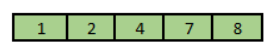

#### Mutation 

Le principe de mutation dans l'algorithme génétique consiste à introduire une variation aléatoire dans les individus de la population afin d'explorer de nouvelles solutions potentiellement meilleures. Dans le contexte de l'algorithme génétique, chaque individu est représenté sous forme de chromosome, généralement sous la forme d'une séquence de gènes. La mutation agit en modifiant aléatoirement certains gènes du chromosome.

Voici le principe de notre mutation : 

- Sur le premier schéma, nous avons une mutation au sein du même chemin pour le même véhicule. Il s'agit simplement d'interchanger 2 villes de position dans la solution, ici le 4 et le 7 (en rouge)

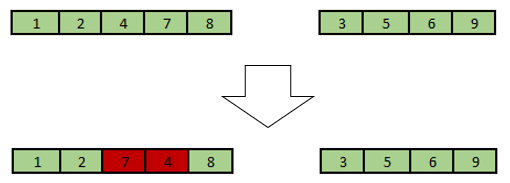

- Sur le second schéma, nous avons une mutation entre deux chemins, et donc entre deux véhicules. Il s'agit d'ajouter (ou d'échanger) deux villes entre les deux chemins, ici l'ajout du 4 (en rouge) dans le chemin 2.

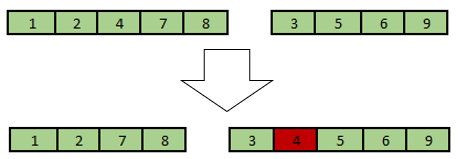


#### Crossover / Croisement



Voici le principe de notre crossover : 

- Les deux premiers tableaux de couleur verte, représentent une solution (une tournée de 2 véhicules).<br>
- Les deux premiers tableaux de couleur jaune, représentent une autre solution (une autre tournée de 2 véhicules).<br>
- Dans un premier temps nous créons une nouvelle solution en gardant (par exemple) les 3 premiers chiffres du premier chemin de la première solution, puis de venir compléter avec les deux derniers chiffres du premier chemin de la seconde solution, et ainsi de suite pour le reste.
- Dans un second temps, nous cherchons les doubles (en rouge sur le schéma) afin de les permuter, pour qu'une ville (chaque ville est représentée par un chiffre sur le schéma) ne soit visitée qu'une seule fois.
- Nous obtenons enfin le résultat de la dernière étape du schéma.

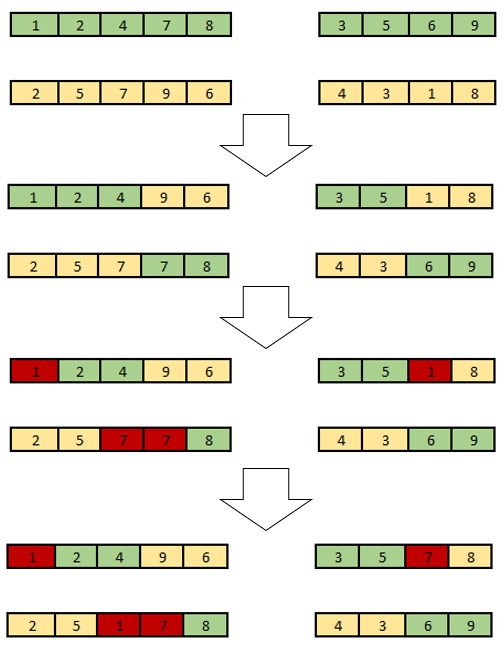


#### Algorithme

##### Constantes

L'algorithme nécessite plusieurs constantes: 
- NO_EXPERIMENT_ITERATIONS: nombre d'itérations de l'algorithme génétique
- NO_GENERATIONS: nombre de génération de l'algorithme génétique
- POPULATION_SIZE: taille de la population, nombre de chromosome par génération
- CROSSOVER_RATE: Probabilité de croisement
- NO_OF_CROSSOVER: Nombre de croisement
- MUTATION_RATE: Probabilité de mutations
- NO_OF_MUTATIONS: Nombre de mutation
- NO_VEHICLES: Nombre de véhicules
- NO_CITIES: Nombre de villes


##### Exécution
L'algorithme est composé de plusieurs boucles. La boucle principale, qui exécute l'algorithme génétique NO_EXPERIMENT_ITERATIONS  fois, et pour chaque exécution, retourne sa meilleure solution. Cette dernière est comparée à la meilleure solution globale pour garder la meilleure des deux.

L'algorithme génétique commence par la génération d'une population de taille POPULATION_SIZE. Cette population initiale sera constitués de 50% de solution aléatoire et 50% de solution au problème mTSP (algorithme glouton).


Après la génération de la population, une première boucle se lance. Elle s'itère NO_GENERATIONS fois. Elle lance une deuxième boucle de taille POPULATION_SIZE*NO_OF_CROSSOVER. Dans celle-ci, au total, POPULATION_SIZE*NO_OF_CROSSOVER*CROSSOVER_RATE enfants seront créés, à partir de 2 parents aléatoires, grâce au croisement. Tous les parents ainsi que les enfants seront ajoutés à la liste new population. 
Pour chaque chromosome de la liste new_population, une boucle de NO_OF_MUTATIONS itérations sera appliquée. Dans celle-ci, en fonction de MUTATION_RATE, une mutation sera appliquée ou non, les chromosomes mutés seront ajoutés à une autre liste mutated_pop, pour préserver les chromosomes avant mutation.

Une fois toute la liste new_population parcourue, le finess sera calculé pour tous les chromosomes, et ils seront tous ajoutés à la liste curr_population où se trouvent les chromosomes de la génération précédente.

Cette liste sera triée, par finess décroissant, et les POPULATION_SIZE meilleurs seront gardés. 


Cette procédure se répète NO_GENERATIONS fois comme dit précédemment. 

A la fin de toutes les itérations, la solution optimale sera trouvée et elle sera affichée dans un graphique.



## PARTIE 2 : IMPLEMENTATION ET EXPLOITATION

### 1. Implémentation de l'algorithme génétique

#### 1.1. Implémentation de l'algorithme

In [1]:
import random
import math
import matplotlib.pyplot as plt
import datetime
import collections
import sys
from dataclasses import dataclass, field
import time
from typing import List
import copy

    # Distance entre deux points
def distance(point1, point2):
    return (point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2


    # Distance entre deux points
class Node:
    def __init__(self, dataval=None):
        self.dataval = dataval
        self.nextval = None


class Glouton():
    def __init__(self, dataval=None):
        self.count = 0
        self.position = None
        self.length = 0

    def get_position():
        return self.position

    def next_city():
        self.position = self.position.nextval
        return self.position

    # ajouter une ville à l'itinéraire actuel avec Time Traveler Algorithm :
    def add_city(self, point):
        node = Node(point)
        if self.count <= 0:
            self.position = node
        elif self.count == 1:
            node.nextval = self.position
            self.position.nextval = node
            self.length = 2 * distance(self.position.dataval, node.dataval)
        else:

            # Créer le voyageur
            traveler = self.position

            c = traveler.dataval  # Position actuelle
            n = traveler.nextval.dataval  # Position suivante

            # Calcul de la longueur d'ajout de la ville au chemin
            Min_L = self.length - distance(c, n) + distance(c, node.dataval) + distance(node.dataval, n)
            Min_Node = traveler

            traveler = traveler.nextval

            while traveler != self.position:
                c = traveler.dataval  # Position actuelle
                n = traveler.nextval.dataval  # Position suivante

                # Calcul de la longueur d'ajout de la ville au chemin
                L = self.length - distance(c, n) + distance(c, node.dataval) + distance(node.dataval, n)

                # Recherche du chemin vers la ville de la ville avec une longueur minimale
                if L < Min_L:
                    Min_L = L
                    Min_Node = traveler

                traveler = traveler.nextval

            # Ajout de la ville au chemin minimum
            node.nextval = Min_Node.nextval
            Min_Node.nextval = node
            self.length = Min_L

        # Incrémenter le nombre de villes dans l'itinéraire
        self.count = self.count + 1

    # Obtenir la liste de l'itinéraire
    def getRoute(self):
        result = []

        traveler = self.position
        result.append(traveler.dataval)

        traveler = traveler.nextval

        while traveler != self.position:
            result.append(traveler.dataval)
            traveler = traveler.nextval

        result.append(traveler.dataval)

        return result

    def Solve(self, Set_points):

        # Copier la liste des points de consigne
        points = Set_points.copy()

        # Transformer la liste en ensemble
        points = set(tuple(i) for i in points)

        # Ajout à la liste
        while len(points) > 0:
            print("Points left : ", len(points), '              ', end="\r")
            point = points.pop()
            self.add_city(point)

        result = self.getRoute()

        return result

    # Génération de point x, y
def generate_points(num_points):
    points = []
    for _ in range(num_points):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        points.append((x, y))
    return points

    # Génération des groupes de k points en fonction des points générés précédemment.
def group_points(points, k):
    groups = [[] for _ in range(k)]
    center_x, center_y = 50, 50

    for point in points:
        x, y = point
        angle = math.atan2(y - center_y, x - center_x)
        if angle < 0:
            angle += 2 * math.pi

        group = int(angle / (2 * math.pi / k))
        groups[group].append(point)

    return groups

    # Affichage des zones groupées en k points grâce à matplotlib
def plot_route(groups, routes):
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray",
              "tab:olive", "tab:cyan"]

    plt.figure(figsize=(8, 8))
    for i, group in enumerate(groups):
        x = [point[0] for point in group]
        y = [point[1] for point in group]
        plt.scatter(x, y, c=colors[i % 10], label=f'Route {i + 1}')

    plt.scatter(50, 50, c='k', marker='*', label='Center')

    i = 0
    for route in routes:
        plt.plot(*zip(*route), c=colors[i % 10], label=f'Route {i + 1}')
        i += 1

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('VRP solution')
    plt.legend()
    plt.grid(True)
    plt.show()

@dataclass
class Chromosome:
    Routes: List[int] = field(default_factory=list)
    fitness: float = 0


def calculate_distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2)**0.5


def create_distance_matrix(locations):
    distance_matrix = []
    for i in range(len(locations)):
        row = []
        for j in range(len(locations)):
            if i == j:
                row.append(0)
            else:
                x1, y1 = locations[i]
                x2, y2 = locations[j]
                distance = calculate_distance(x1, y1, x2, y2)
                row.append(distance)
        distance_matrix.append(row)
    return distance_matrix


def gen_distance_matrix(xcities, ycities):
    distance_matrix = []
    for i in range(NO_CITIES):
        row = []
        for j in range(NO_CITIES):
            if i == j:
                row.append(0)
            else:
                distance = calculate_distance(xcities[i], ycities[i], xcities[j], ycities[j])
                row.append(distance)
        distance_matrix.append(row)

    return distance_matrix


def gen_chromosome():
    if(random.uniform(0, 1) < 0.5):
        Routes = []
        cities = list(range(0, NO_CITIES))

        for i in range(NO_VEHICLES):
            Routes.append([])

        for i in range(NO_CITIES):
            truck = random.randint(0, NO_VEHICLES-1)
            city = random.choice(cities)
            cities.remove(city)
            Routes[truck].append(city)


        return Chromosome(copy.deepcopy(Routes))
    else:
        return Chromosome(copy.deepcopy(TSPRoutes))


def gen_population():
    _chromosomes = []
    for i in range(0, POPULATION_SIZE):
        _chromosomes.append(gen_chromosome())
    return _chromosomes


def calculate_route_distance(c: Chromosome):
    distances = []

    for i in c.Routes:
        if len(i) != 0:
            distance = 0
            distance += distance_matrix[0][i[0]]
            for j in range(1, len(i)):
                distance += distance_matrix[i[j - 1]][i[j]]

            distance += distance_matrix[0][i[-1]]
            distances.append(distance)

    return distances


def max_route_distances(c: Chromosome):
    return max(calculate_route_distance(c))


def evaluate_fitness(c: Chromosome):
    distance = max_route_distances(c)
    if distance == 0:
        c.fitness = 0
    else:
        c.fitness = 1 / distance


def select_parent(chromosomes):
    total_fitness = 0
    chroms_fitness = []
    for chrom in chromosomes:
        total_fitness += chrom.fitness
        chroms_fitness.append(chrom.fitness)

    # Créer les probabilités de sélection à partir de la fitness mise à l'échelle
    selection_probabilities = [f_s / total_fitness for f_s in chroms_fitness]

    selected_chrom = random.choices(chromosomes, weights=selection_probabilities)[0]

    return selected_chrom


def delete_random_occurrence(list_of_lists, element):
    random_index = random.randint(0, len(list_of_lists) - 1)  # Generate random index

    for sublist in list_of_lists[random_index:]:
        if element in sublist:
            sublist.remove(element)
            return list_of_lists

    for sublist in list_of_lists[:random_index]:
        if element in sublist:
            sublist.remove(element)
            return list_of_lists


def get_repeated(Route):
    route1_index_route = []
    route1_index_city = []

    for gen1 in range(NO_CITIES):
        repeat = 0

        for route in Route:
            repeat += route.count(gen1)

        if repeat > 1:
            route_indexes = []
            city_indexes = []

            for j in range(len(Route)):
                for i, e in enumerate(Route[j]):
                    if e == gen1:
                        city_indexes.append(i)
                        route_indexes.append(j)

            index = random.randint(0, len(city_indexes) - 1)
            route1_index_route.append(route_indexes[index])
            route1_index_city.append(city_indexes[index])

    return route1_index_route, route1_index_city


def do_crossover(parent1: Chromosome, parent2: Chromosome):
    child_routes1 = []
    child_routes2 = []

    for i in range(NO_VEHICLES):
        route1 = parent1.Routes[i]
        route2 = parent2.Routes[i]

        # Effectuer un croisement
        if len(route1) > 1:
            crossover_point = random.randint(0, len(route1) - 1)
        else:
            crossover_point = 1

        # Créer des itinéraires enfants en préservant l'ordre des villes des deux parents
        child_route1 = route1[:crossover_point] + route2[crossover_point:]
        child_route2 = route2[:crossover_point] + route1[crossover_point:]

        # Supprimez les doublons et assurez-vous que tous les numéros des listes de départ sont présents
        child_route1 = [city for city in child_route1 if city not in child_route1[:child_route1.index(city)]]
        child_route2 = [city for city in child_route2 if city not in child_route2[:child_route2.index(city)]]

        child_routes1.append(child_route1)
        child_routes2.append(child_route2)

    route1_index_route, route1_index_city = get_repeated(child_routes1)
    route2_index_route, route2_index_city = get_repeated(child_routes2)

    length = min(len(route2_index_route), len(route1_index_route))

    for i in range(length):
        child_routes1[route1_index_route[i]][route1_index_city[i]], child_routes2[route2_index_route[i]][
            route2_index_city[i]] = \
            child_routes2[route2_index_route[i]][route2_index_city[i]], child_routes1[route1_index_route[i]][
                route1_index_city[i]]

    leftover = []
    if len(route2_index_route) < len(route1_index_route):

        for i in range(len(route2_index_route), len(route1_index_route)):
            leftover.append(child_routes1[route1_index_route[i]][route1_index_city[i]])

        index = 0
        for i in range(len(route2_index_route), len(route1_index_route)):
            child_routes1[route1_index_route[i]][route1_index_city[i]] = 0
            rand_route = random.randint(0, len(child_routes2) - 1)
            if len(child_routes2[rand_route]) > 1:
                rand_index = random.randint(0, len(child_routes2[rand_route]) - 1)
            else:
                rand_index = 0
            child_routes2[rand_route].insert(rand_index, leftover[index])
            index += 1

        child_routes1 = [[e for e in sublist if e != 0] for sublist in child_routes1]

    elif len(route2_index_route) > len(route1_index_route):
        for i in range(len(route1_index_route), len(route2_index_route)):
            leftover.append(child_routes2[route2_index_route[i]][route2_index_city[i]])

        index = 0
        for i in range(len(route1_index_route), len(route2_index_route)):
            child_routes2[route2_index_route[i]][route2_index_city[i]] = 0
            rand_route = random.randint(0, len(child_routes1) - 1)
            if len(child_routes1[rand_route]) > 1:
                rand_index = random.randint(0, len(child_routes1[rand_route]) - 1)
            else:
                rand_index = 0

            child_routes1[rand_route].insert(rand_index, leftover[index])
            index += 1

        child_routes2 = [[e for e in sublist if e != 0] for sublist in child_routes2]

    child_1 = Chromosome(child_routes1)
    child_2 = Chromosome(child_routes2)

    evaluate_fitness(child_1)
    evaluate_fitness(child_2)

    if child_1.fitness > child_2.fitness:
        return child_1
    else:
        return child_2


def do_mutation(c: Chromosome):
    old_chrom = Chromosome(copy.deepcopy(c.Routes), c.fitness)

    rand = random.uniform(0, 1)
    if rand < 0.5:
        swap_genes_vehicle(c)
    else:
        swap_genes_vehicles(c)

    return old_chrom


def swap_genes_vehicle(c: Chromosome):
    route = random.randint(0, len(c.Routes) - 1)
    if len(c.Routes[route]) <= 1:
        return

    swapping_index_1 = random.randint(0, len(c.Routes[route]) - 1)
    swapping_index_2 = random.randint(0, len(c.Routes[route]) - 1)

    if swapping_index_1 == swapping_index_2:
        return

    c.Routes[route][swapping_index_1], c.Routes[route][swapping_index_2] = c.Routes[route][swapping_index_2], \
                                                                           c.Routes[route][swapping_index_1]


def swap_genes_vehicles(c: Chromosome):
    route1 = random.randint(0, len(c.Routes) - 1)
    route2 = random.randint(0, len(c.Routes) - 1)

    if len(c.Routes[route2]) == 0:
        return

    if len(c.Routes[route1]) > 1:
        swapping_index_1 = random.randint(0, len(c.Routes[route1]) - 1)
    elif len(c.Routes[route1]) == 1:
        swapping_index_1 = 1
    else:
        swapping_index_1 = 0

    if len(c.Routes[route2]) > 1:
        swapping_index_2 = random.randint(0, len(c.Routes[route2]) - 1)
    elif len(c.Routes[route2]) == 1:
        swapping_index_2 = 0

    if route1 == route2 and swapping_index_1 == swapping_index_2:
        return

    city = c.Routes[route2][swapping_index_2]
    c.Routes[route2].remove(c.Routes[route2][swapping_index_2])
    c.Routes[route1].insert(swapping_index_1, city)


    # Renvoie le meilleur chromosome d'une population
def get_best_chromosome(population):
    max_fitness = - sys.maxsize
    best_chrom = Chromosome([])
    for c in population:
        if c.fitness > max_fitness:
            max_fitness = c.fitness
            best_chrom = c
    return best_chrom


    # Montre le phénotype d'un chromosome
def print_phenotype(c: Chromosome):
    distances = calculate_route_distance(c)
    sum_distances = sum(distances)
    print("The total cost of the paths is:", "{:.2f}".format(sum_distances))

    for i in range(0, NO_VEHICLES):
        print("Route #", i + 1, ":", sep="", end=" ")
        print(0, end=" ")
        for j in c.Routes[i]:
            print(j, end=" ")
        print(0, end=" ")
        print("The cost of the path is:", "{:.2f}".format(distances[i]))

    print("")
    
    return sum_distances


def ga_solve():
    curr_population = gen_population()
    for chrom in curr_population:
        evaluate_fitness(chrom)

    for i in range(0, NO_GENERATIONS):
        new_population = []
        new_population += copy.deepcopy(curr_population)
        for j in range(0, POPULATION_SIZE * NO_OF_CROSSOVER):

            parent1 = select_parent(curr_population)
            if random.uniform(0, 1) < CROSSOVER_RATE:
                parent2 = random.choice(curr_population)
                child = do_crossover(parent1, parent2)
            else:
                child = parent1
            new_population.append(child)

        mutated_pop = []
        for index in range(len(new_population)):
            for j in range(0, NO_OF_MUTATIONS):
                if random.uniform(0, 1) < MUTATION_RATE:
                    chrom = do_mutation(new_population[index])
                    mutated_pop.append(chrom)

        curr_population += new_population
        curr_population += mutated_pop
        
        for pop in curr_population:
            evaluate_fitness(pop)

        curr_population.sort(key=lambda x: x.fitness, reverse=True)

        curr_population = curr_population[:POPULATION_SIZE]

    return get_best_chromosome(curr_population)


    # Affichage grâce à matplotlib les differents chemins trouvés par l'algorithme 
def plot_map(c: Chromosome, xcities, ycities):
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray",
              "tab:olive",
              "tab:cyan"]

    i = 0
    for route in c.Routes:
        x_points = []
        y_points = []
        for j in route:
            x_points.append(xcities[j])
            y_points.append(ycities[j])

        x_points.insert(0, xcities[0])
        y_points.insert(0, ycities[0])
        x_points.append(xcities[0])
        y_points.append(ycities[0])

        plt.plot(x_points[1:-1], y_points[1:-1], label="Route" + str(i + 1), marker='o', color=colors[i % 10])
        plt.plot(x_points[:2], y_points[:2], color=colors[i % 10], linestyle="--")
        plt.plot(x_points[-2:], y_points[-2:], color=colors[i % 10], linestyle="--")
        i += 1

    plt.plot(xcities[0], ycities[0], marker='o', color='black')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('VRP solution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
def step1():
    points = generate_points(NO_CITIES-1)
    groups = group_points(points, NO_VEHICLES)

    print("Solving VRP")

    routes = []

    for group in groups:
        group.append((50, 50))
        tsp = Glouton()
        route = tsp.Solve(group)
        routes.append(route)

    points.insert(0, (50, 50))

    xcities = [point[0] for point in points]
    ycities = [point[1] for point in points]
    distance_matrix = gen_distance_matrix(xcities, ycities)

    TSPRoutes = []

    for route in routes:
        indexes = []
        for point in route:
            for i in range(len(xcities)):
                if xcities[i] == point[0] and ycities[i] == point[1]:
                    indexes.append(i)
                    break
        TSPRoutes.append(indexes)

    for index in range(len(TSPRoutes)):
        TSPRoutes[index].pop()
        zero_index = TSPRoutes[index].index(0)
        sublist = TSPRoutes[index][:zero_index+1]
        TSPRoutes[index] = TSPRoutes[index][zero_index+1:]
        TSPRoutes[index].extend(sublist)
        TSPRoutes[index].remove(0)
        
    return points, groups, xcities, ycities, distance_matrix, TSPRoutes

    # Affichage du temps mis par l'algorithme précédent pour trouver les chemins ainsi que le nombre d'itérations 
def step2():
    best_chromosome = Chromosome(copy.deepcopy(TSPRoutes))
    evaluate_fitness(best_chromosome)

    total_cpu_time = 0

    best_chrom_runtime = total_cpu_time

    for i in range(0, NO_EXPERIMENT_ITERATIONS):
        start_time = time.time()
        chrom = ga_solve()
        evaluate_fitness(chrom)
        end_time = time.time()

        total_cpu_time += end_time - start_time

        if chrom.fitness > best_chromosome.fitness:
            best_chromosome = chrom
            best_chrom_runtime = total_cpu_time


    print_phenotype(best_chromosome)
    plot_map(best_chromosome, xcities, ycities)
    print(best_chromosome.fitness)

    print("\nBest result in detail\n")
    print("Total CPU Time: ", "{:.2f}".format(total_cpu_time), "s", sep="")
    print("Total number of runs:", NO_EXPERIMENT_ITERATIONS)
    print("Runtime of the algorithm for the best solution: ", "{:.2f}".format(best_chrom_runtime), "s", sep="")
    
    return total_cpu_time, best_chrom_runtime

#### 1.2. Démonstration du fonctionnement de cette implémentation sur différents cas de test

Pour 10 villes : 

Solving VRP
The total cost of the paths is: 321.83
Route #1: 0 3 8 2 5 1 0 The cost of the path is: 161.61
Route #2: 0 7 6 4 9 0 The cost of the path is: 160.22



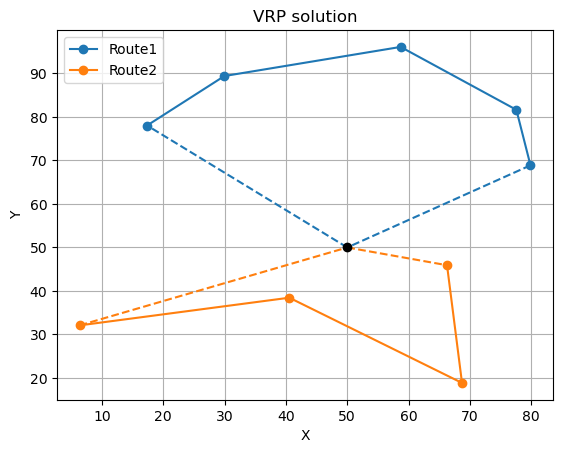

0.006187621352358165

Best result in detail

Total CPU Time: 0.23s
Total number of runs: 10
Runtime of the algorithm for the best solution: 0.03s


In [3]:
nbcities = []
execution_time = []
best_solution_runtime = []
distance_matrix = []

NO_GENERATIONS = 10
POPULATION_SIZE = 10
CROSSOVER_RATE = 0.1
NO_OF_CROSSOVER = 10
MUTATION_RATE = 0.1
NO_OF_MUTATIONS = 10

NO_VEHICLES = 2
NO_CITIES = 10
NO_EXPERIMENT_ITERATIONS = 10

MAP_BORDERS = 100

points, groups, xcities, ycities, distance_matrix, TSPRoutes = step1()

total_cpu_time, best_chrom_runtime = step2()

nbcities.append(NO_CITIES)
execution_time.append(total_cpu_time)
best_solution_runtime.append(best_chrom_runtime)

Pour 25 villes : 

Solving VRP
The total cost of the paths is: 585.53
Route #1: 0 13 14 4 1 9 8 0 The cost of the path is: 151.66
Route #2: 0 11 18 10 2 24 7 6 0 The cost of the path is: 150.97
Route #3: 0 16 12 20 23 17 3 0 The cost of the path is: 150.68
Route #4: 0 15 22 19 5 21 0 The cost of the path is: 132.23



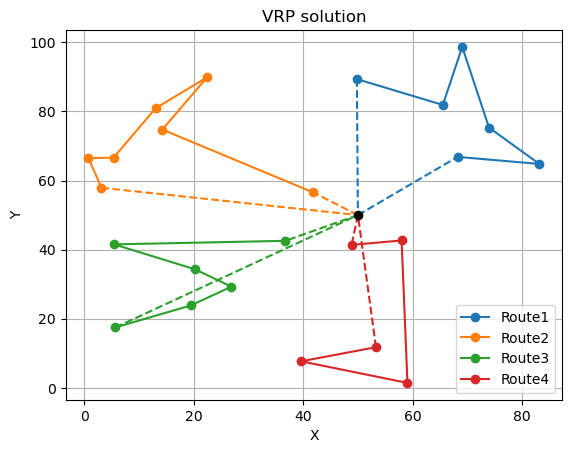

0.006593862462371329

Best result in detail

Total CPU Time: 0.94s
Total number of runs: 10
Runtime of the algorithm for the best solution: 0.54s


In [4]:
NO_GENERATIONS = 10
POPULATION_SIZE = 25
CROSSOVER_RATE = 0.1
NO_OF_CROSSOVER = 10
MUTATION_RATE = 0.1
NO_OF_MUTATIONS = 10

NO_VEHICLES = 4
NO_CITIES = 25
NO_EXPERIMENT_ITERATIONS = 10

MAP_BORDERS = 100

points, groups, xcities, ycities, distance_matrix, TSPRoutes = step1()

total_cpu_time, best_chrom_runtime = step2()

nbcities.append(NO_CITIES)
execution_time.append(total_cpu_time)
best_solution_runtime.append(best_chrom_runtime)

Pour 50 villes : 

Solving VRP
The total cost of the paths is: 946.37
Route #1: 0 8 38 10 19 9 0 The cost of the path is: 104.96
Route #2: 0 17 12 27 30 2 0 The cost of the path is: 150.95
Route #3: 0 42 6 33 7 36 48 3 11 0 The cost of the path is: 152.50
Route #4: 0 5 44 18 14 20 1 0 The cost of the path is: 151.21
Route #5: 0 49 31 35 25 47 16 41 34 45 43 29 0 The cost of the path is: 150.56
Route #6: 0 13 21 26 46 24 40 4 15 0 The cost of the path is: 113.57
Route #7: 0 37 39 32 22 23 28 0 The cost of the path is: 122.61



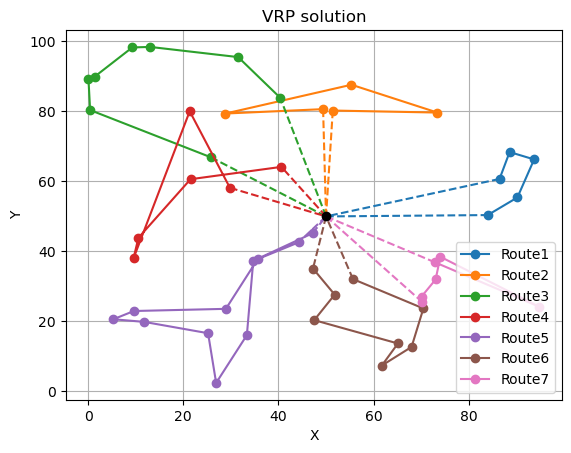

0.006557381376878061

Best result in detail

Total CPU Time: 3.62s
Total number of runs: 10
Runtime of the algorithm for the best solution: 2.15s


In [5]:
NO_GENERATIONS = 10
POPULATION_SIZE = 50
CROSSOVER_RATE = 0.1
NO_OF_CROSSOVER = 10
MUTATION_RATE = 0.1
NO_OF_MUTATIONS = 10

NO_VEHICLES = 7
NO_CITIES = 50
NO_EXPERIMENT_ITERATIONS = 10

MAP_BORDERS = 100

points, groups, xcities, ycities, distance_matrix, TSPRoutes = step1()

total_cpu_time, best_chrom_runtime = step2()

nbcities.append(NO_CITIES)
execution_time.append(total_cpu_time)
best_solution_runtime.append(best_chrom_runtime)

Pour 100 villes : 

Solving VRP
The total cost of the paths is: 1499.06
Route #1: 0 31 89 75 24 77 82 95 49 0 The cost of the path is: 153.49
Route #2: 0 86 56 35 44 84 65 1 85 0 The cost of the path is: 157.89
Route #3: 0 13 71 42 45 51 73 43 12 3 54 30 57 0 The cost of the path is: 161.23
Route #4: 0 41 88 61 92 66 72 94 55 4 79 64 67 5 93 2 99 0 The cost of the path is: 163.07
Route #5: 0 20 37 74 48 97 46 91 32 81 15 26 22 0 The cost of the path is: 161.23
Route #6: 0 17 52 69 63 25 58 0 The cost of the path is: 145.89
Route #7: 0 8 98 68 7 16 70 78 76 0 The cost of the path is: 156.65
Route #8: 0 21 10 6 18 62 80 83 39 9 38 59 0 The cost of the path is: 112.22
Route #9: 0 87 96 33 53 29 0 The cost of the path is: 144.40
Route #10: 0 47 60 11 14 50 40 27 19 23 90 34 28 36 0 The cost of the path is: 143.01



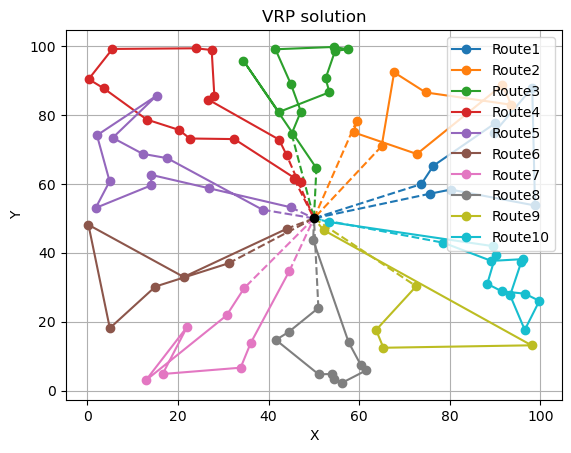

0.006132239581557728

Best result in detail

Total CPU Time: 21.85s
Total number of runs: 10
Runtime of the algorithm for the best solution: 17.41s


In [6]:
NO_GENERATIONS = 10
POPULATION_SIZE = 100
CROSSOVER_RATE = 0.1
NO_OF_CROSSOVER = 10
MUTATION_RATE = 0.1
NO_OF_MUTATIONS = 10

NO_VEHICLES = 10
NO_CITIES = 100
NO_EXPERIMENT_ITERATIONS = 10

MAP_BORDERS = 1000

points, groups, xcities, ycities, distance_matrix, TSPRoutes = step1()

total_cpu_time, best_chrom_runtime = step2()

nbcities.append(NO_CITIES)
execution_time.append(total_cpu_time)
best_solution_runtime.append(best_chrom_runtime)

### 2. Implémentation de l'algorithme glouton

#### 2.1. Implémentation de l'algorithme

In [7]:
import random
import math
import matplotlib.pyplot as plt

import math
import random
import datetime
import matplotlib.pyplot as plt


# Calcule de la distance entre deux points
def distance(point1, point2):
    return (point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2


# Calcule la distance entre deux points
class Node:
    def __init__(self, dataval=None):
        self.dataval = dataval
        self.nextval = None

# Utilisation du Glouton
class Glouton():
    def __init__(self, dataval=None):
        self.count = 0
        self.position = None
        self.length = 0

    def get_position():
        return self.position

    def next_city():
        self.position = self.position.nextval
        return self.position

    # adding a city to the current route with Time Traveler Algorithm :
    def add_city(self, point):
        node = Node(point)
        if self.count <= 0:
            self.position = node
        elif self.count == 1:
            node.nextval = self.position
            self.position.nextval = node
            self.length = 2 * distance(self.position.dataval, node.dataval)
        else:

            # Création du chemin 'traveler' 
            traveler = self.position

            c = traveler.dataval  # current position
            n = traveler.nextval.dataval  # next position

            #Calcul de la longueur d'ajout de la ville au chemin
            Min_L = self.length - distance(c, n) + distance(c, node.dataval) + distance(node.dataval, n)
            Min_Node = traveler

            traveler = traveler.nextval

            while traveler != self.position:
                c = traveler.dataval  # current position
                n = traveler.nextval.dataval  # next position

                # Calcul de la longueur d'ajout de la ville au chemin
                L = self.length - distance(c, n) + distance(c, node.dataval) + distance(node.dataval, n)

                # Recherche du chemin vers la ville de la ville avec une longueur minimale
                if L < Min_L:
                    Min_L = L
                    Min_Node = traveler

                traveler = traveler.nextval

            # Ajout de la ville au chemin minimum
            node.nextval = Min_Node.nextval
            Min_Node.nextval = node
            self.length = Min_L

        # Incrémenter le nombre de villes dans l'itinéraire
        self.count = self.count + 1

    # Obtenir la liste de l'itinéraire
    def getRoute(self):
        result = []

        traveler = self.position
        result.append(traveler.dataval)

        traveler = traveler.nextval

        while traveler != self.position:
            result.append(traveler.dataval)
            traveler = traveler.nextval

        result.append(traveler.dataval)

        return result

    def Solve(self, Set_points):

        # Copier la liste des points de consigne
        points = Set_points.copy()

        # Transformer la liste en ensemble
        points = set(tuple(i) for i in points)

        # Ajout
        while len(points) > 0:
            print("Points left : ", len(points), '              ', end="\r")
            point = points.pop()
            self.add_city(point)

        result = self.getRoute()

        return result

    # Génération de point en x, y
def generate_points(num_points):
    points = []
    for _ in range(num_points):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        points.append((x, y))
    return points

    # Regoupe des poits en k groupes en fonction du centre x, y 
def group_points(points, k):
    groups = [[] for _ in range(k)]
    center_x, center_y = 50, 50
    radius = 50

    angles = [i * 2 * math.pi / k for i in range(k)]

    for point in points:
        x, y = point
        angle = math.atan2(y - center_y, x - center_x)
        if angle < 0:
            angle += 2 * math.pi

        group = int(angle / (2 * math.pi / k))
        groups[group].append(point)

    return groups

    # Affichage grâce à Matplotlib des différents groupes précédemment créés ainsi que des chemins.
def plot_route(groups, routes):
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray",
              "tab:olive", "tab:cyan"]

    plt.figure(figsize=(8, 8))
    for i, group in enumerate(groups):
        x = [point[0] for point in group]
        y = [point[1] for point in group]
        plt.scatter(x, y, c=colors[i % 10])

    plt.scatter(50, 50, c='k', marker='*', label='Center')

    i = 0
    for route in routes:
        plt.plot(*zip(*route), c=colors[i % 10], label=f'Route {i + 1}')
        i += 1

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Algorithme glouton')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    # Affichage des routes sous forme de liste ainsi que des distances
def print_route(routes):
    routes_distances = []
    for i in range(0, k):
        route_distance = 0 
        for j in range(len(routes[i])-1):
            route_distance += (distance(routes[i][j], routes[i][j+1]))**0.5
        routes_distances.append(route_distance)

    sum_distances = sum(routes_distances)
    print("The total cost of the paths is:", "{:.2f}".format(sum_distances))
    print("The total finess of the route is:", "{:.4f}".format(1/max(routes_distances)))

    for i in range(0, k):
        print("Route #", i + 1, ":")
        print("The cost of the path is:", "{:.2f}".format(routes_distances[i]))
        
    return sum_distances

In [8]:
# Affichage du temps mis pour l'exécution du code précédent
def result2():
    points = generate_points(num_points)
    groups = group_points(points, k)

    print("Solving VRP")

    # For calculating execution time
    time_start = datetime.datetime.now()

    routes = []

    for group in groups:
        group.append((50, 50))
        tsp = Glouton()
        route = tsp.Solve(group)
        routes.append(route)

    # For calculating execution time
    time_end = datetime.datetime.now()
    delta = (time_end - time_start).total_seconds()

    print("Execution time : ", delta, "secs")

    plot_route(groups, routes)
    print_route(routes)
    
    return delta

#### 2.2.  Démonstration du fonctionnement de cette implémentation sur différents cas de test

Pour 10 villes : 

Solving VRP
Execution time :  0.0 secs


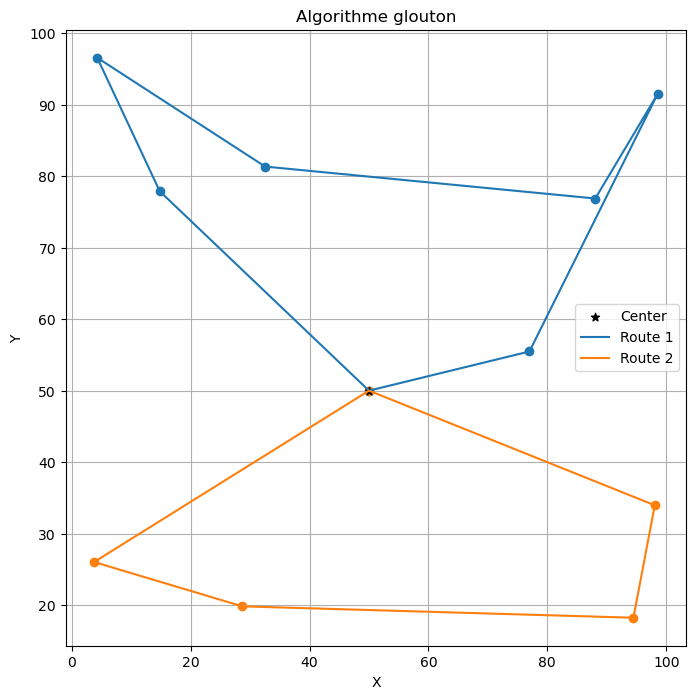

The total cost of the paths is: 452.07
The total finess of the route is: 0.0041
Route # 1 :
The cost of the path is: 241.71
Route # 2 :
The cost of the path is: 210.37


In [9]:
nbvilles = []
tempsexec = []
temps_meilleure_solution = []

# Usage
num_points = 10
k = 2

delta = result2()

nbvilles.append(num_points)
tempsexec.append(delta)

Pour 25 villes : 

Solving VRP
Execution time :  0.0 secs


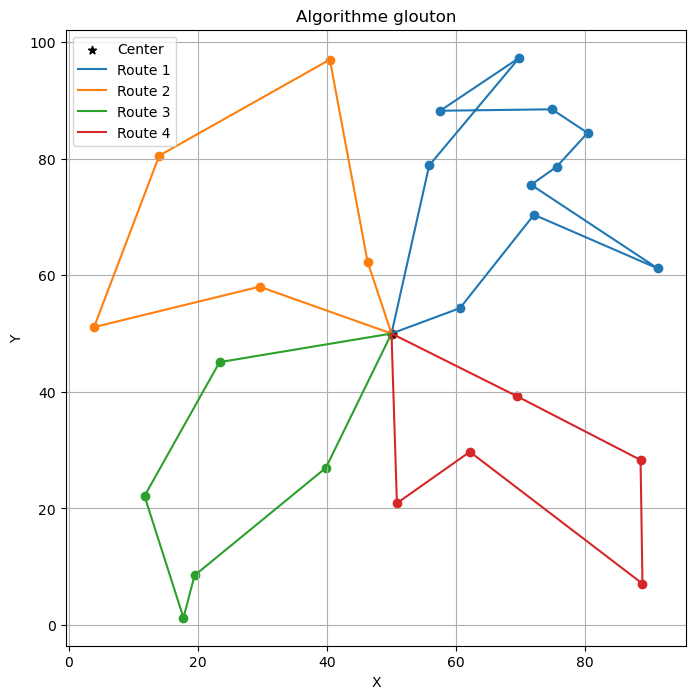

The total cost of the paths is: 618.75
The total finess of the route is: 0.0055
Route # 1 :
The cost of the path is: 181.32
Route # 2 :
The cost of the path is: 158.80
Route # 3 :
The cost of the path is: 134.66
Route # 4 :
The cost of the path is: 143.97


In [10]:
# Usage
num_points = 25
k = 4

delta = result2()

nbvilles.append(num_points)
tempsexec.append(delta)

Pour 50 villes : 

Solving VRP
Execution time :  0.001106 secs


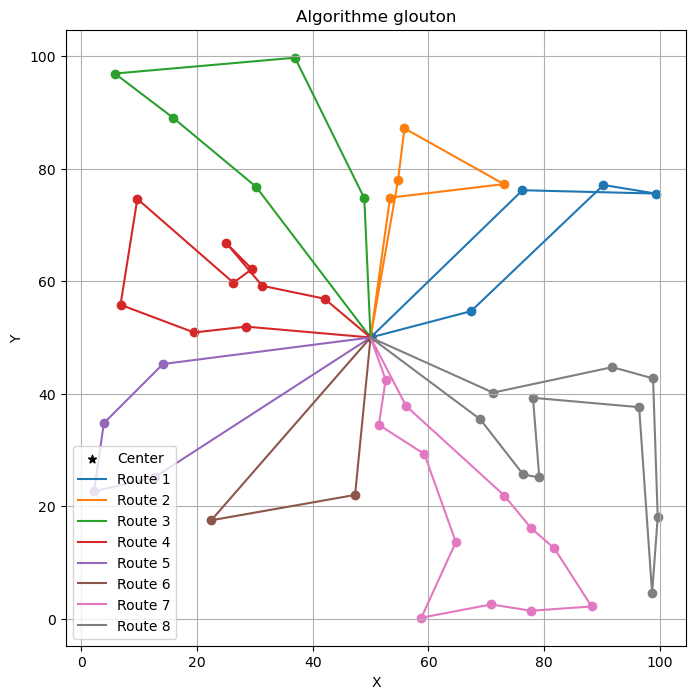

The total cost of the paths is: 1056.00
The total finess of the route is: 0.0051
Route # 1 :
The cost of the path is: 119.30
Route # 2 :
The cost of the path is: 102.40
Route # 3 :
The cost of the path is: 148.76
Route # 4 :
The cost of the path is: 127.37
Route # 5 :
The cost of the path is: 118.76
Route # 6 :
The cost of the path is: 96.02
Route # 7 :
The cost of the path is: 148.50
Route # 8 :
The cost of the path is: 194.88


In [11]:
# Usage
num_points = 50
k = 8

delta = result2()

nbvilles.append(num_points)
tempsexec.append(delta)

Pour 100 villes : 

Solving VRP
Execution time :  0.007138 secs


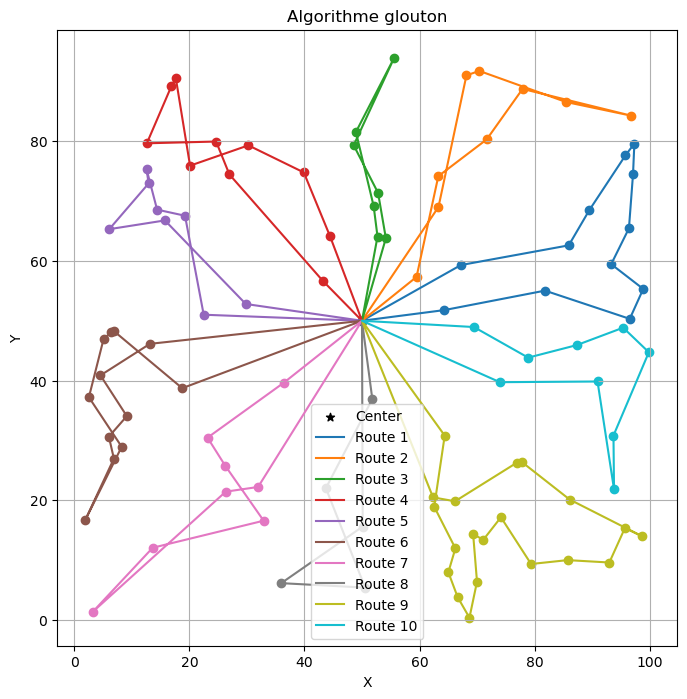

The total cost of the paths is: 1376.50
The total finess of the route is: 0.0054
Route # 1 :
The cost of the path is: 140.21
Route # 2 :
The cost of the path is: 145.26
Route # 3 :
The cost of the path is: 93.72
Route # 4 :
The cost of the path is: 126.59
Route # 5 :
The cost of the path is: 118.94
Route # 6 :
The cost of the path is: 159.88
Route # 7 :
The cost of the path is: 154.45
Route # 8 :
The cost of the path is: 114.20
Route # 9 :
The cost of the path is: 184.13
Route # 10 :
The cost of the path is: 139.12


In [12]:
# Usage
num_points = 100
k = 10

delta = result2()

nbvilles.append(num_points)
tempsexec.append(delta)

### 4. Etude expérimentale (plan d'expérience)


Le problème du VRP est un problème d'optimisation combinatoire dans lequel un ensemble de véhicules doit être utilisé pour livrer un ensemble de clients à partir d'un dépôt central. Le but est de minimiser la distance totale parcourue par les véhicules tout en satisfaisant les contraintes de capacité des véhicules et les demandes des clients. Voici un plan d'expérience pour aborder le problème du VRP :

1. Définition des paramètres :
    - Nombre de véhicules : 10.
    - Nombre de villes : 100.
    - Coordonnées des villes : générées aléatoirement. <br>
<br>    
2. Génération d'instances :
    - Génération d'instances aléatoires en utilisant les paramètres définis précédemment. <br>
<br>    
3. Développement de l'algorithme :
    - Choix un algorithme de résolution du VRP, l'algorithme génétique.
    - Implémentation de l'algorithme sélectionné en utilisant le langage de programmation Python. <br>
<br>
4. Évaluation de l'algorithme :
    - Exécution de l'algorithme sur les instances générées.
    - Mesure des performances de l'algorithme en termes de :
        - Distance totale parcourue par les véhicules.
        - Temps total d'exécution de l'algorithme.
        - Temps de calcul nécessaire pour obtenir une solution. <br>
<br>        
5. Analyse des résultats & conclusion :
    - Analyse des résultats obtenus et identification des forces et des faiblesses de l'algorithme.
    - Identification des cas où l'algorithme donne de bonnes solutions et les cas où il peut être amélioré. <br>
<br>

Ce plan d'expérience permettra d'explorer et d'améliorer les performances de l'algorithme de résolution du VRP. Il faut ajuster et faire varier les paramètres et les étapes.



Nous allons réaliser une étude statistique sur les temps d'éxécution pour chaque cas de test ci-dessus.

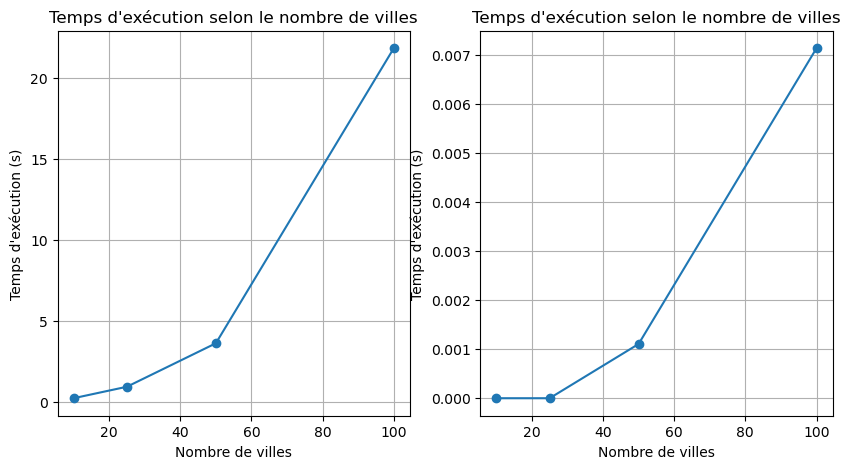

In [13]:
def plot_stat():
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax1.plot(nbcities, execution_time, marker='o')
    ax1.set_xlabel("Nombre de villes")
    ax1.set_ylabel("Temps d'exécution (s)")
    ax1.set_title("Temps d'exécution selon le nombre de villes")
    ax1.grid(True)
    
    ax2.plot(nbvilles, tempsexec, marker='o')
    ax2.set_xlabel("Nombre de villes")
    ax2.set_ylabel("Temps d'exécution (s)")
    ax2.set_title("Temps d'exécution selon le nombre de villes")
    ax2.grid(True)

    plt.show()

    
plot_stat()

Nous allons réaliser à présent une étude statistique sur le temps nécessaire à l'algorithme pour trouver la solution optimale.

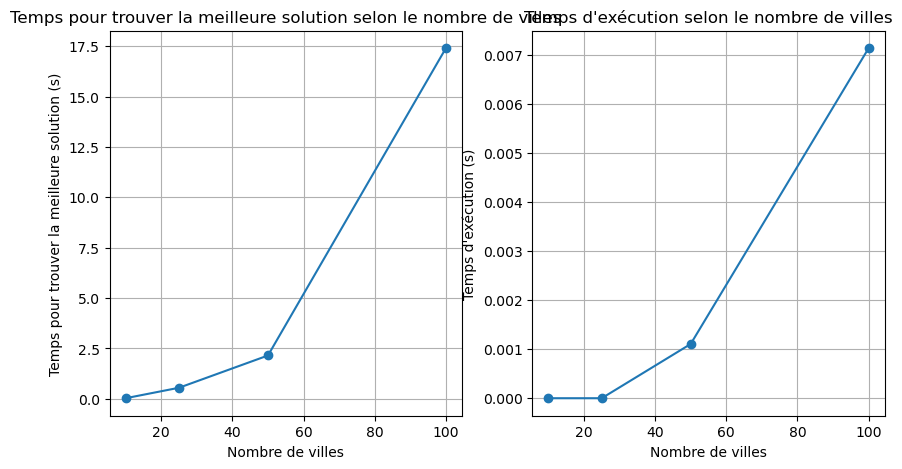

In [14]:
def plot_stat2():
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax3.plot(nbcities, best_solution_runtime, marker='o')
    ax3.set_xlabel("Nombre de villes")
    ax3.set_ylabel("Temps pour trouver la meilleure solution (s)")
    ax3.set_title("Temps pour trouver la meilleure solution selon le nombre de villes")
    ax3.grid(True)
    
    ax4.plot(nbvilles, tempsexec, marker='o')
    ax4.set_xlabel("Nombre de villes")
    ax4.set_ylabel("Temps d'exécution (s)")
    ax4.set_title("Temps d'exécution selon le nombre de villes")
    ax4.grid(True)
    
    plt.show()

    
plot_stat2()

Nous allons à présent évaluer la qualité de nos solutions à l'aide du solveur PuLP. Ce solveur nous proposera une solution optimale, qui sera la distance globale, que nous comparerons à nos solutions afin d'évaluer leurs qualités. Plus l'écart entre notre solution et la solution optimale sera petite, meilleure sera la qualité de cette solution.

Le solveur PuLP : 

In [15]:
from pulp import *
import random

def gen_random_cities(n):
    xcities = []
    ycities = []
    
    for i in range(n):
        xcities.append(random.randint(0, 100))
        ycities.append(random.randint(0, 100))
        
    xcities[0] = 50
    ycities[0] = 50
    
    return xcities, ycities

def calculate_distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def gen_distance_matrix(xcities, ycities):
    distance_matrix = []
    for i in range(len(xcities)):
        row = []
        for j in range(len(xcities)):
            if i == j:
                row.append(0)
            else:
                distance = calculate_distance(xcities[i], ycities[i], xcities[j], ycities[j])
                row.append(int(distance))
        distance_matrix.append(row)

    return distance_matrix


def linear_algo_result(n, K, xcities, ycities):
    xcities, ycities = gen_random_cities(n)
    d = gen_distance_matrix(xcities, ycities)

    assignment_problem = LpProblem("Assignment_Problem", LpMinimize)

    problem_variable = {}
    for i in range(n+1):
        for j in range(n+1):
            for k in range(K):
                problem_variable[(i, j, k)] = LpVariable("x_{}_{}_{}".format(i, j, k), cat = "Binary")

    assignment_problem += lpSum(d[i-1][j-1] * problem_variable[(i, j, k)] for i in range(1, n+1) for j in range(1, n+1) for k in range(K))

    for k in range(K):
        assignment_problem += lpSum(problem_variable[(0, j, k)] for j in range(1, n+1)) == K
        assignment_problem += lpSum(problem_variable[(i, 0, k)] for i in range(1, n+1)) == K

    for i in range(1, n+1):
        assignment_problem += lpSum(problem_variable[(i, j, k)] for j in range(1, n+1) for k in range(K)) == 1
        assignment_problem += lpSum(problem_variable[(j, i, k)] for i in range(1, n+1) for k in range(K)) == 1

    for k in range(K):
        for i in range(n):
            assignment_problem += problem_variable[(i, i, k)] == 0

    assignment_problem.solve()

    print("Total distance traveled by Linear Algorithm method :", value(assignment_problem.objective))
    
    return value(assignment_problem.objective)

Modification des fonctions de résolution des algorithmes GA et Glouton pour qu'ils ne générent pas de villes.

Algorithme génétique :

In [16]:
def step1(xcities, ycities):
    points = []
    for i in range(1, len(xcities)):
        points.append((xcities[i], ycities[i]))
    groups = group_points(points, NO_VEHICLES)

    #print("Solving VRP")

    routes = []

    for group in groups:
        group.append((50, 50))
        tsp = Glouton()
        route = tsp.Solve(group)
        routes.append(route)

    points.insert(0, (50, 50))
    


    distance_matrix = gen_distance_matrix(xcities, ycities)

    TSPRoutes = []

    for route in routes:
        indexes = []
        for point in route:
            for i in range(len(xcities)):
                if xcities[i] == point[0] and ycities[i] == point[1]:
                    indexes.append(i)
                    break
        TSPRoutes.append(indexes)

    for index in range(len(TSPRoutes)):
        TSPRoutes[index].pop()
        zero_index = TSPRoutes[index].index(0)
        sublist = TSPRoutes[index][:zero_index+1]
        TSPRoutes[index] = TSPRoutes[index][zero_index+1:]
        TSPRoutes[index].extend(sublist)
        TSPRoutes[index].remove(0)
        
    return points, groups, distance_matrix, TSPRoutes

def step2(xcities, ycities):
    best_chromosome = Chromosome(copy.deepcopy(TSPRoutes))
    evaluate_fitness(best_chromosome)

    total_cpu_time = 0

    best_chrom_runtime = total_cpu_time

    for i in range(0, NO_EXPERIMENT_ITERATIONS):
        start_time = time.time()
        chrom = ga_solve()
        evaluate_fitness(chrom)
        end_time = time.time()

        total_cpu_time += end_time - start_time

        if chrom.fitness > best_chromosome.fitness:
            best_chromosome = chrom
            best_chrom_runtime = total_cpu_time


    sum_distance = print_phenotype(best_chromosome)
    plot_map(best_chromosome, xcities, ycities)
    print(best_chromosome.fitness)

#     print("\nBest result in detail\n")
#     print("Total CPU Time: ", "{:.2f}".format(total_cpu_time), "s", sep="")
#     print("Total number of runs:", NO_EXPERIMENT_ITERATIONS)
#     print("Runtime of the algorithm for the best solution: ", "{:.2f}".format(best_chrom_runtime), "s", sep="")
    
    return total_cpu_time, best_chrom_runtime, sum_distance

Glouton :

In [17]:
def result2(xcities, ycities):
    points = []
    for i in range(1, len(xcities)):
        points.append((xcities[i], ycities[i]))
    groups = group_points(points, k)

    #print("Solving VRP")

    # For calculating execution time
    time_start = datetime.datetime.now()

    routes = []

    for group in groups:
        group.append((50, 50))
        tsp = Glouton()
        route = tsp.Solve(group)
        routes.append(route)

    # For calculating execution time
    time_end = datetime.datetime.now()
    delta = (time_end - time_start).total_seconds()

    #print("Execution time : ", delta, "secs")

    plot_route(groups, routes)
    sum_distance = print_route(routes)
    
    return delta, sum_distance

Total distance traveled by Linear Algorithm method : 220.0


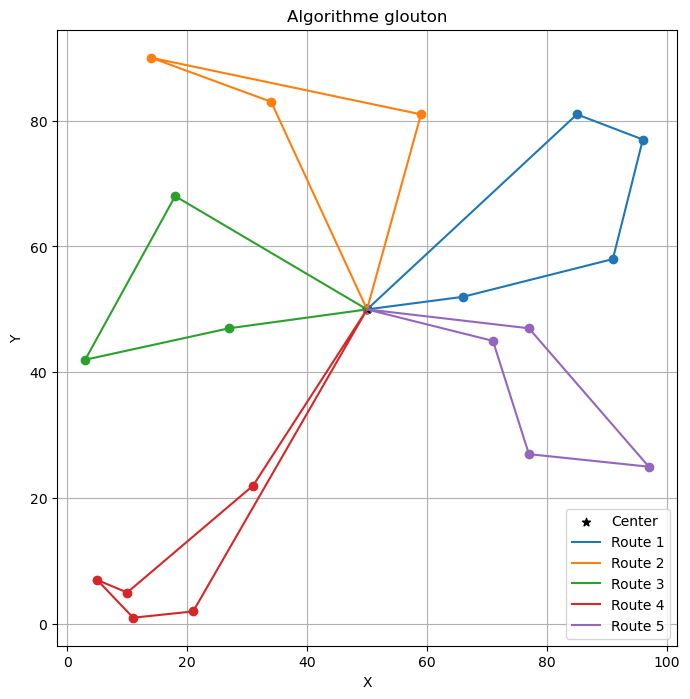

The total cost of the paths is: 628.83
The total finess of the route is: 0.0071
Route # 1 :
The cost of the path is: 119.94
Route # 2 :
The cost of the path is: 136.04
Route # 3 :
The cost of the path is: 114.44
Route # 4 :
The cost of the path is: 140.86
Route # 5 :
The cost of the path is: 117.56
The total cost of the paths is: 644.00
Route #1: 0 16 12 19 2 0 The cost of the path is: 130.00
Route #2: 0 17 8 10 0 The cost of the path is: 134.00
Route #3: 0 18 5 13 0 The cost of the path is: 129.00
Route #4: 0 9 4 3 11 14 0 The cost of the path is: 136.00
Route #5: 0 1 6 15 7 0 The cost of the path is: 115.00



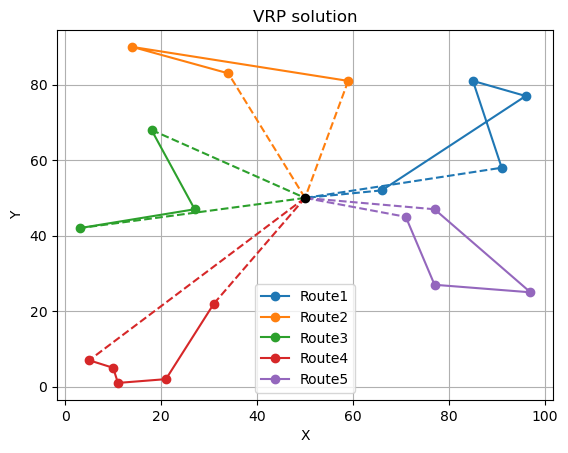

0.007352941176470588


In [18]:
import time
n = 20 
K = 5

NO_GENERATIONS = 10
POPULATION_SIZE = 100
CROSSOVER_RATE = 0.1
NO_OF_CROSSOVER = 10
MUTATION_RATE = 0.1
NO_OF_MUTATIONS = 10

NO_VEHICLES = K
NO_CITIES = n
NO_EXPERIMENT_ITERATIONS = 10

MAP_BORDERS = 100

k = K

xcities, ycities = gen_random_cities(n)

nbvilles = []
tempsexec = []
nbcities = []
execution_time = []
best_solution_runtime= []

linear_algo_dist = linear_algo_result(n, K, xcities, ycities)

delta, mtsp_algo_dist = result2(xcities, ycities)

nbvilles.append(NO_CITIES)
tempsexec.append(delta)


points, groups, distance_matrix, TSPRoutes = step1(xcities, ycities)

total_cpu_time, best_chrom_runtime, ga_algo_dist = step2(xcities, ycities)

nbcities.append(NO_CITIES)
execution_time.append(total_cpu_time)
best_solution_runtime.append(best_chrom_runtime)

In [19]:
# Comparaison entre l'algorithme Glouton et l'alorithme linéaire : 
finesse_lineaire = 1 / linear_algo_dist
finesse_ga = 1 / ga_algo_dist
finesse_mtsp = 1 / mtsp_algo_dist

print("borne supérieure : ", round(finesse_lineaire, 5))
print("valeur de la solution avec algorithme Glouton:", round(finesse_mtsp, 5))
print("valeur de la solution avec algorithme génétique:", round(finesse_ga, 5))

resultmTSP = (finesse_mtsp)*100 / (finesse_lineaire)
resultga = (finesse_ga)*100 / (finesse_lineaire)

print("\n\nLa solution de l'algorithme Glouton vaux: ", round(resultmTSP), "% de la solution optimale")
print("La solution de l'algorithme génétique vaux: ", round(resultga), "% de la solution optimale")

borne supérieure :  0.00455
valeur de la solution avec algorithme Glouton: 0.00159
valeur de la solution avec algorithme génétique: 0.00155


La solution de l'algorithme Glouton vaux:  35 % de la solution optimale
La solution de l'algorithme génétique vaux:  34 % de la solution optimale


## Conclusion

En conclusion, ce livrable répond à l'appel lancé par l'ADEME à destination de notre entreprise CesiCDP, concernant leur volonté d'optimiser les livraisons pour équiper la ville de lampadaires "intelligent". 
    
Notre mission consistait alors à apporter une solution au problème de la tournée de véhicule (VRP) en optimisant la distance parcourue par chaque camion disponible, de sorte à ce que les distances parcourues par camion soient le plus homogène possible.
    
Pour ce faire, nous avons dans un premier temps utilisé deux algorithmes, le premier, un algorithme glouton pour répondre au problème du multi-TSP, et le second, un algorithme génétique pour répondre au problème du VRP.
    Dans un dernier temps, nous avons implémenté un plan d'expérience et réalisé une analyse des résultats en comparant nos deux algorithmes.
    
Nous sommes conscients que notre algorithme génétique n'est pas parfait et que nous aurons à l'améliorer s'il veut répondre aux exigeances de qualités et de performances souhaitées. C'est pour cette raison que nous proposons en pistes de solutions l'amélioration de l'algorithme génétique, ainsi que celui de programmation linéaire (calcul de la borne inférieure avec la bibliothèque PuLP).
    
